# 时间序列
- Date和Time
    - datetime
    - 在String和datetime之间转换
- 时间序列基础
    - Indexing, selection, subsetting
    - Time series with duplicate indices
- Date ranges,Frequencies,Shifting
    - 生成date ranges
    - Frequencies 和 Date Offsets
        - Week of month dates
    - Shifting (leading and lagging) data
        - Shifting dates with offsets
- 处理Time Zone
    - Localization 与 Conversion
    - 对time zone-aware Timestamp objects的操作
    - 不同time zones之间的操作
- Periods 与 Period Arithmetic
    - Period Frequency转换
    - Quarterly period frequencies
- Timestamps 与 Periods之间的转换
    - 基于arrays创建PeriodIndex
- Resampling 与 Frequency Conversion
    - Downsampling
        - Open-High-Low-Close (OHLC) resampling
        - Resampling with GroupBy
    - Upsampling 与 interpolation
    - Resampling with periods
- Time series绘图
- Moving window functions
    - Exponentially-weighted functions
    - Binary moving window functions
    - User-defined moving window functions
- Performance and Memory Usage Notes

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

## Date和Time
### datetime

In [4]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 9, 27, 8, 6, 34, 288052)

In [5]:
now.year, now.month, now.day

(2017, 9, 27)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 在String和datetime之间转换

In [12]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [13]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [14]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [19]:
datestrs

['7/6/2011', '8/6/2011']

In [20]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [21]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
idx[2]

NaT

In [23]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 时间序列基础

In [24]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.565702
2011-01-05   -1.687072
2011-01-07    0.707622
2011-01-08    0.063544
2011-01-10   -0.264266
2011-01-12   -0.813378
dtype: float64

In [25]:
type(ts)

pandas.core.series.Series

In [26]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts[::2]

2011-01-02    0.565702
2011-01-07    0.707622
2011-01-10   -0.264266
dtype: float64

In [27]:
ts + ts[::2]

2011-01-02    1.131403
2011-01-05         NaN
2011-01-07    1.415243
2011-01-08         NaN
2011-01-10   -0.528533
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [31]:
stamp = ts.index[2]
ts[stamp]

0.70762174058884642

In [32]:
ts['1/10/2011']

-0.26426631582129934

In [33]:
ts['20110110']

-0.26426631582129934

In [34]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.228779
2000-01-02   -0.795288
2000-01-03    0.953318
2000-01-04   -1.980789
2000-01-05    1.723060
2000-01-06   -0.103717
                ...   
2002-09-21    0.369617
2002-09-22    0.544376
2002-09-23    0.590372
2002-09-24    0.968108
2002-09-25   -0.176399
2002-09-26   -1.497336
Freq: D, dtype: float64

In [35]:
longer_ts['2001']

2001-01-01    0.712466
2001-01-02    1.100190
2001-01-03    1.243971
2001-01-04   -0.296406
2001-01-05   -0.724637
2001-01-06    0.347705
                ...   
2001-12-26    0.901613
2001-12-27    1.762555
2001-12-28   -0.764730
2001-12-29    1.408395
2001-12-30    0.415371
2001-12-31   -0.610622
Freq: D, dtype: float64

In [36]:
longer_ts['2001-05']

2001-05-01    0.848026
2001-05-02    1.377832
2001-05-03   -0.127264
2001-05-04    0.693130
2001-05-05    1.548151
2001-05-06   -0.688580
                ...   
2001-05-26   -0.017576
2001-05-27   -0.237381
2001-05-28    0.826002
2001-05-29    0.154987
2001-05-30   -1.065646
2001-05-31   -0.522912
Freq: D, dtype: float64

In [37]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.707622
2011-01-08    0.063544
2011-01-10   -0.264266
2011-01-12   -0.813378
dtype: float64

In [38]:
ts

2011-01-02    0.565702
2011-01-05   -1.687072
2011-01-07    0.707622
2011-01-08    0.063544
2011-01-10   -0.264266
2011-01-12   -0.813378
dtype: float64

In [39]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.707622
2011-01-08    0.063544
2011-01-10   -0.264266
dtype: float64

In [40]:
ts.truncate(after='1/9/2011')

2011-01-02    0.565702
2011-01-05   -1.687072
2011-01-07    0.707622
2011-01-08    0.063544
dtype: float64

In [41]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.989923,0.100629,0.313417,-0.842567
2001-05-09,0.843694,-1.534756,1.269702,0.558605
2001-05-16,-0.328930,-1.378899,0.821359,-0.940109
2001-05-23,-1.202729,1.448352,-0.159466,-0.363744
2001-05-30,-1.032177,0.299827,-1.651684,0.544951


### Time series with duplicate indices

In [42]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [43]:
dup_ts.index.is_unique

False

In [44]:
dup_ts['1/3/2000']  # not duplicated

4

In [45]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [46]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [47]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges,Frequencies,Shifting

In [48]:
ts

2011-01-02    0.565702
2011-01-05   -1.687072
2011-01-07    0.707622
2011-01-08    0.063544
2011-01-10   -0.264266
2011-01-12   -0.813378
dtype: float64

In [50]:
ts.resample('D').mean()

2011-01-02    0.565702
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -1.687072
2011-01-06         NaN
2011-01-07    0.707622
2011-01-08    0.063544
2011-01-09         NaN
2011-01-10   -0.264266
2011-01-11         NaN
2011-01-12   -0.813378
Freq: D, dtype: float64

### 生成date ranges

In [52]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [53]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [56]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies 和 Date Offsets

In [58]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [59]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [60]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [61]:
Hour(2) + Minute(30)

<150 * Minutes>

In [62]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [63]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', offset='WOM-3FRI')]

### Shifting (leading and lagging) data

In [64]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.875364
2000-02-29    0.502469
2000-03-31   -0.171319
2000-04-30    0.125373
Freq: M, dtype: float64

In [65]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.875364
2000-04-30    0.502469
Freq: M, dtype: float64

In [66]:
ts.shift(-2)

2000-01-31   -0.171319
2000-02-29    0.125373
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [67]:
ts.shift(2, freq='M')

2000-03-31   -0.875364
2000-04-30    0.502469
2000-05-31   -0.171319
2000-06-30    0.125373
Freq: M, dtype: float64

In [68]:
ts.shift(3, freq='D')

2000-02-03   -0.875364
2000-03-03    0.502469
2000-04-03   -0.171319
2000-05-03    0.125373
dtype: float64

In [69]:
ts.shift(1, freq='3D')

2000-02-03   -0.875364
2000-03-03    0.502469
2000-04-03   -0.171319
2000-05-03    0.125373
dtype: float64

In [70]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.875364
2000-02-29 01:30:00    0.502469
2000-03-31 01:30:00   -0.171319
2000-04-30 01:30:00    0.125373
Freq: M, dtype: float64

#### Shifting dates with offsets

In [71]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [72]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [73]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [74]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [75]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [76]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.030566
2000-02-29    0.012485
2000-03-31    0.273106
dtype: float64

In [78]:
ts.resample('M').mean()

2000-01-31    0.030566
2000-02-29    0.012485
2000-03-31    0.273106
Freq: M, dtype: float64

## 处理Time Zone

In [79]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [80]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization 与 Conversion

In [84]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.453906
2012-03-10 09:30:00    0.332122
2012-03-11 09:30:00    0.435377
2012-03-12 09:30:00    0.083879
2012-03-13 09:30:00   -0.931932
2012-03-14 09:30:00   -1.336335
Freq: D, dtype: float64

In [85]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.453906
2012-03-10 09:30:00+00:00    0.332122
2012-03-11 09:30:00+00:00    0.435377
2012-03-12 09:30:00+00:00    0.083879
2012-03-13 09:30:00+00:00   -0.931932
2012-03-14 09:30:00+00:00   -1.336335
Freq: D, dtype: float64

In [87]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [88]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.453906
2012-03-10 04:30:00-05:00    0.332122
2012-03-11 05:30:00-04:00    0.435377
2012-03-12 05:30:00-04:00    0.083879
2012-03-13 05:30:00-04:00   -0.931932
2012-03-14 05:30:00-04:00   -1.336335
Freq: D, dtype: float64

In [89]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.453906
2012-03-10 14:30:00+00:00    0.332122
2012-03-11 13:30:00+00:00    0.435377
2012-03-12 13:30:00+00:00    0.083879
2012-03-13 13:30:00+00:00   -0.931932
2012-03-14 13:30:00+00:00   -1.336335
Freq: D, dtype: float64

In [90]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.453906
2012-03-10 15:30:00+01:00    0.332122
2012-03-11 14:30:00+01:00    0.435377
2012-03-12 14:30:00+01:00    0.083879
2012-03-13 14:30:00+01:00   -0.931932
2012-03-14 14:30:00+01:00   -1.336335
Freq: D, dtype: float64

In [91]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 对time zone-aware Timestamp objects的操作

In [92]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [93]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [94]:
stamp_utc.value

1299902400000000000

In [95]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [96]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [97]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [98]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [99]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同time zones之间的操作

In [104]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.101628
2012-03-08 09:30:00   -0.654708
2012-03-09 09:30:00    0.989692
2012-03-12 09:30:00   -0.734905
2012-03-13 09:30:00    0.358327
2012-03-14 09:30:00   -0.787494
2012-03-15 09:30:00    1.444926
2012-03-16 09:30:00   -0.376153
2012-03-19 09:30:00   -0.290302
2012-03-20 09:30:00    0.964305
Freq: B, dtype: float64

In [105]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods 与 Period Arithmetic

In [106]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [107]:
p + 5

Period('2012', 'A-DEC')

In [108]:
p - 2

Period('2005', 'A-DEC')

In [109]:
pd.Period('2014', freq='A-DEC') - p

7

In [110]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [111]:
Series(np.random.randn(6), index=rng)

2000-01    0.614840
2000-02    0.890623
2000-03    0.941936
2000-04    0.169367
2000-05   -0.189136
2000-06    0.375268
Freq: M, dtype: float64

In [112]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

### Period Frequency转换

In [113]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [114]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [115]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [116]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [117]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [118]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.567658
2007   -0.852788
2008    0.823700
2009    1.371516
Freq: A-DEC, dtype: float64

In [119]:
ts.asfreq('M', how='start')

2006-01   -1.567658
2007-01   -0.852788
2008-01    0.823700
2009-01    1.371516
Freq: M, dtype: float64

In [120]:
ts.asfreq('B', how='end')

2006-12-29   -1.567658
2007-12-31   -0.852788
2008-12-31    0.823700
2009-12-31    1.371516
Freq: B, dtype: float64

### Quarterly period frequencies

In [121]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [122]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [123]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [124]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [125]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [126]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [127]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Timestamps 与 Periods之间的转换

In [128]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31   -0.348594
2000-02-29   -0.304516
2000-03-31   -1.325023
Freq: M, dtype: float64

In [129]:
pts

2000-01   -0.348594
2000-02   -0.304516
2000-03   -1.325023
Freq: M, dtype: float64

In [130]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.739244
2000-01    0.761055
2000-01    0.802550
2000-02   -1.270017
2000-02   -0.847379
2000-02    0.455448
Freq: M, dtype: float64

In [131]:
pts = ts.to_period()
pts

2000-01   -0.348594
2000-02   -0.304516
2000-03   -1.325023
Freq: M, dtype: float64

In [132]:
pts.to_timestamp(how='end')

2000-01-31   -0.348594
2000-02-29   -0.304516
2000-03-31   -1.325023
Freq: M, dtype: float64

### 基于arrays创建PeriodIndex

In [133]:
data = pd.read_csv('data/dataload/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [134]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [135]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [136]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling 与 Frequency Conversion

In [138]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31    0.171632
2000-02-29    0.365339
2000-03-31   -0.086013
2000-04-30    0.546906
Freq: M, dtype: float64

In [140]:
ts.resample('M', kind='period').mean()

2000-01    0.171632
2000-02    0.365339
2000-03   -0.086013
2000-04    0.546906
Freq: M, dtype: float64

### Downsampling

In [141]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [143]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [144]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [145]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [146]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [148]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [149]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [150]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling 与 interpolation

In [151]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.799699,1.590934,-1.127490,-2.700001
2000-01-12,1.651639,-0.610842,0.852813,-0.597216


In [152]:
df_daily = frame.resample('D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.799699,1.590934,-1.127490,-2.700001
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.651639,-0.610842,0.852813,-0.597216


In [154]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.799699,1.590934,-1.127490,-2.700001
2000-01-06,-0.799699,1.590934,-1.127490,-2.700001
2000-01-07,-0.799699,1.590934,-1.127490,-2.700001
2000-01-08,-0.799699,1.590934,-1.127490,-2.700001
2000-01-09,-0.799699,1.590934,-1.127490,-2.700001
2000-01-10,-0.799699,1.590934,-1.127490,-2.700001
2000-01-11,-0.799699,1.590934,-1.127490,-2.700001
2000-01-12,1.651639,-0.610842,0.852813,-0.597216


In [155]:
frame.resample('D', limit=2).ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.799699,1.590934,-1.127490,-2.700001
2000-01-06,-0.799699,1.590934,-1.127490,-2.700001
2000-01-07,-0.799699,1.590934,-1.127490,-2.700001
2000-01-08,-0.799699,1.590934,-1.127490,-2.700001
2000-01-09,-0.799699,1.590934,-1.127490,-2.700001
2000-01-10,-0.799699,1.590934,-1.127490,-2.700001
2000-01-11,-0.799699,1.590934,-1.127490,-2.700001
2000-01-12,1.651639,-0.610842,0.852813,-0.597216


In [156]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.799699,1.590934,-1.127490,-2.700001
2000-01-13,1.651639,-0.610842,0.852813,-0.597216


### Resampling with periods

In [157]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,2.290082,-0.129522,-0.397431,1.365917
2000-02,1.051305,0.817828,0.072323,-0.431014
2000-03,0.595253,-0.990475,0.047518,-0.068770
2000-04,-0.710055,1.858339,1.483295,0.438756
2000-05,-1.095381,0.289149,-0.686528,-1.481185


In [159]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.063270,0.539081,0.20194,-0.094692
2001,0.135226,0.498567,0.06089,0.448338


In [161]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.063270,0.539081,0.20194,-0.094692
2000Q2,-0.063270,0.539081,0.20194,-0.094692
2000Q3,-0.063270,0.539081,0.20194,-0.094692
2000Q4,-0.063270,0.539081,0.20194,-0.094692
2001Q1,0.135226,0.498567,0.06089,0.448338
2001Q2,0.135226,0.498567,0.06089,0.448338
2001Q3,0.135226,0.498567,0.06089,0.448338
2001Q4,0.135226,0.498567,0.06089,0.448338


In [163]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.063270,0.539081,0.20194,-0.094692
2000Q2,-0.063270,0.539081,0.20194,-0.094692
2000Q3,-0.063270,0.539081,0.20194,-0.094692
2000Q4,-0.063270,0.539081,0.20194,-0.094692
2001Q1,0.135226,0.498567,0.06089,0.448338
2001Q2,0.135226,0.498567,0.06089,0.448338
2001Q3,0.135226,0.498567,0.06089,0.448338
2001Q4,0.135226,0.498567,0.06089,0.448338


In [164]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.063270,0.539081,0.20194,-0.094692
2001Q1,-0.063270,0.539081,0.20194,-0.094692
2001Q2,-0.063270,0.539081,0.20194,-0.094692
2001Q3,-0.063270,0.539081,0.20194,-0.094692
2001Q4,0.135226,0.498567,0.06089,0.448338
2002Q1,0.135226,0.498567,0.06089,0.448338
2002Q2,0.135226,0.498567,0.06089,0.448338
2002Q3,0.135226,0.498567,0.06089,0.448338


## Time series绘图

In [166]:
close_px_all = pd.read_csv('data/dataload/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


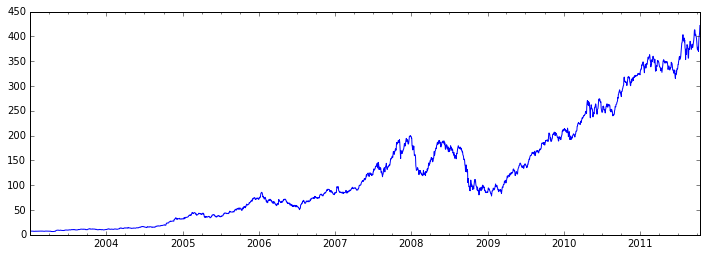

In [167]:
close_px['AAPL'].plot()

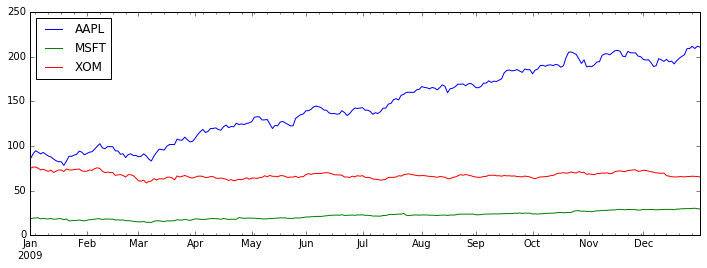

In [168]:
close_px.ix['2009'].plot()

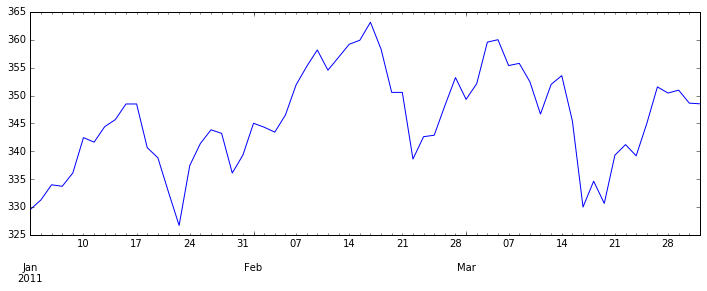

In [169]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

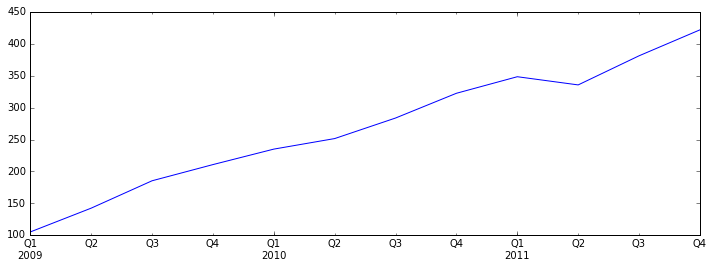

In [170]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot()

In [171]:
close_px = close_px.asfreq('B').fillna(method='ffill')

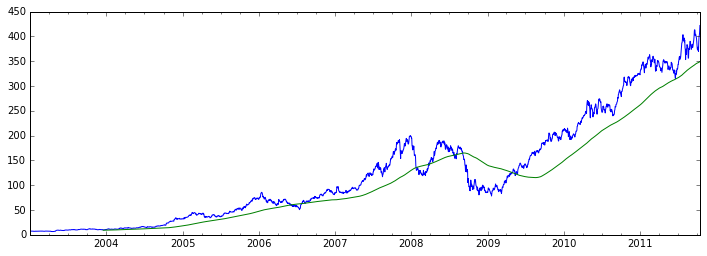

In [175]:
close_px.AAPL.plot()
Series.rolling(close_px.AAPL, 250).mean().plot()

In [176]:
plt.figure()

In [178]:
appl_std250 = Series.rolling(close_px.AAPL, 250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

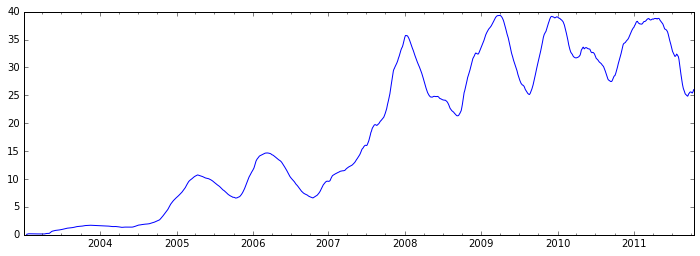

In [179]:
appl_std250.plot()

In [180]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

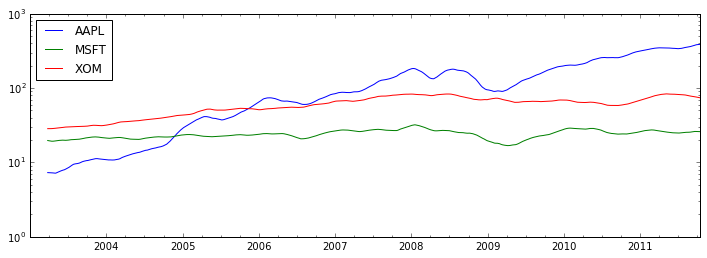

In [182]:
DataFrame.rolling(close_px, 60).mean().plot(logy=True)

In [183]:
plt.close('all')

### Exponentially-weighted functions

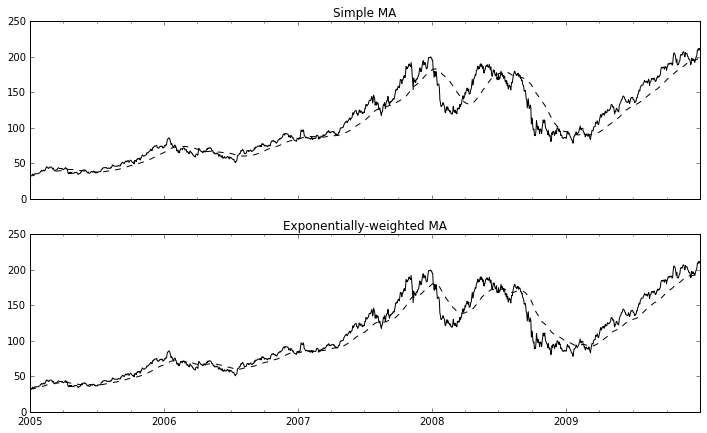

In [186]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = Series.rolling(aapl_px, 60, min_periods=50).mean()
ewma60 = Series.ewm(aapl_px, span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [187]:
close_px
spx_px = close_px_all['SPX']

/Users/zhangjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  app.launch_new_instance()


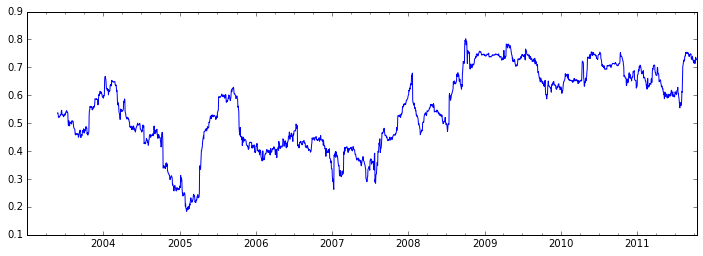

In [192]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

/Users/zhangjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  if __name__ == '__main__':


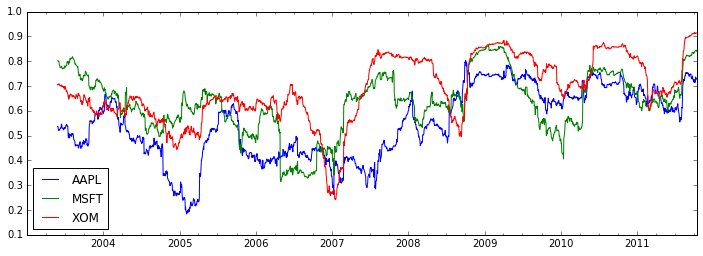

In [193]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

/Users/zhangjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  app.launch_new_instance()


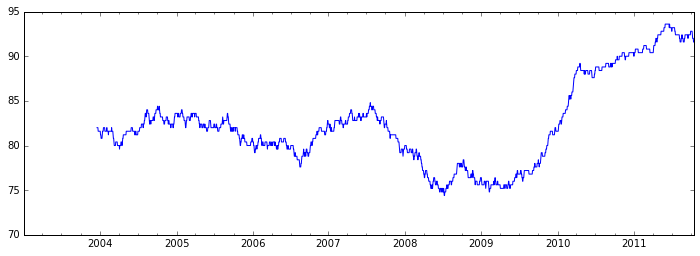

In [194]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [195]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -0.916109
2000-01-01 00:00:00.010   -1.799505
2000-01-01 00:00:00.020    0.212204
2000-01-01 00:00:00.030    0.583011
2000-01-01 00:00:00.040   -1.188305
2000-01-01 00:00:00.050   -1.133429
                             ...   
2000-01-02 03:46:39.940   -0.497624
2000-01-02 03:46:39.950    0.285204
2000-01-02 03:46:39.960   -0.917112
2000-01-02 03:46:39.970   -0.528171
2000-01-02 03:46:39.980    0.500511
2000-01-02 03:46:39.990   -1.044137
Freq: 10L, dtype: float64

In [197]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [198]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 104 ms per loop


In [199]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

1 loop, best of 3: 130 ms per loop
